In [48]:
from core.component import RawHtmlContent
from pathlib import Path
import bs4
from typing import List
import pandas as pd
import json

In [2]:
db = 'DB-Raw'
all_files = list(Path(db).glob('*.json'))

In [3]:
sample = RawHtmlContent.load(all_files[0])

In [102]:
class Body:
    def __init__(self, content, ignore=[]) -> None:
        self.soup = bs4.BeautifulSoup(content, 'html.parser')
        self.body = self.soup.body

        if ignore:
            if self.body: self.body = self.ignore(self.body, ignore)

    @staticmethod
    def ignore(body, tags=[]):
        new_body = body
        if tags:
            for tag in tags:
                for t in new_body.find_all(tag):
                    if t: t.decompose()
        return new_body

    def extract_lines(self, word_thresh = 2):
        lines = []
        def recursive_extract(tag):

            if isinstance(tag, bs4.element.Tag):
                for t in tag.children:
                    recursive_extract(t)
            else:
                text = tag.text
                if len(text.split(' ')) > word_thresh:
                    lines.append(text)

        if self.body: recursive_extract(self.body)

        return lines
        
ignore = ['script', 'img', 'table', 'button', 'i', 'noscript', 'style', 'form', 'meta']
sample_body = Body(sample.content, ignore=ignore)

In [5]:
lines = sample_body.extract_lines()
len(lines)

97

In [6]:
class CleanLines:
    remove = ['\n', '\r', '\t', '\xa0', '..', '...', '©', '™', '  ']
    separator = '. '
    line_separator = separator

    def __init__(self, lines, 
    lower=False, unique=True,
    remove=[], add_to_remove=[],
    inner_split=True) -> None:

        if remove: self.remove = remove
        if add_to_remove: self.remove.extend(add_to_remove)
        if not inner_split: self.line_separator = '<><><><><><><><><><><>'

        cleaned = []
        for line in lines:
            for t in self.remove:
                line = line.replace(t, '')

            if line:
                if lower: line = line.lower()
                for l in line.split(self.line_separator):
                    cleaned.append(l.strip())

        if unique: cleaned = list(set(cleaned))
        self.lines = cleaned


    def match_vocab(self, vocab):
        matching = []
        for line in self.lines:
            for word in line.split(' '):
                if word in vocab:
                    matching.append(line)
                    break
        return matching

    def __call__(self):
        return self.lines

cleaned = CleanLines(lines, lower=True)

In [33]:
from nltk.corpus import stopwords
S = stopwords.words('english')

VOCABALL = ['marking','packaging','Waste','Metallized','fiber','2','Specially','1016','cassettes','capacity','carboxymethylcellulose','Photo',"Builders'",'hardened','inner','sugar','Reflectorized','part','adjuvants','confining','ornamental','Low','gift-packaging','Face','derailleur','goods','gemstones','Alginic','stoppers','sheets','wipes','sheeting','Copolymers','supported','kg/m<sup>2</sup>','finger','weight','dispensers','Polylactic','Acrylic','polymers','knobs','creamers','valances','Having','chapter','close','signs','plastics','3913','tile','-610','Sacks','venetian','coumarone','Ethylene-alpha-olefin','Less','Windows','attached','dispersion','88','1.492','clips','rods','foil','number','similarly','bicycle','window','O-Rings','Pneumatic','document','saucers','8701.20','produced','hoods','lavatory','unsaturated','Plasticized','mechanical','Polytetrafluoroethylene','Lavatory','Allyl','1.44','152.4','sanitary','chloride','Styrene-acrylonitrile','Cellulose','Acrylonitrile-butadiene-styrene','length','lids','phenolic','lead','Laboratory','coachwork','Natural','photographic','tabs','-11','cyanate','ribbon','11.36','Containing','device','protein','plasticizers','Cross-linked','put','Jacquard','Woven','Picture','Window','crates','retail','monomer','bands','synthetic','phenyl','scrap','rolls','gravy','defined','90','Ice','less','viscosity','set','noncellular','polysulfides','sinks','8903','except','slides','thereof','24-diisocyanate-135-tris1-methyl-','whole','boxes','carrier','form','cleanout','gift-wrapping','door','terpolymers','baths','Salt','Combined','pessaries','shells','flanges','$1.70','Hydrocarbon','3914','similar','fibers','manholes','coverings','crystal','resin','isophthalic','Cements','$1.35','SCRAP','Phenolic','specific','cones','higher','Medium','otherwise','exceeding','coumarone-indene','ribbons','pepper','6','worked','Plates','Seamless','longer','described','relative','70','sports','platters','-69','Cards','foregoing','flushing','pets','alginic','self-adhesive','Granular','Elastic','based','articles','cellulose','motors','pleasure','combined','300','temporarily','polymethyl','yachts','phenyl]-ω-[[[26-bis1-methylethyl-','casings','polyethylene','reticles','alcohol','acid-laurolactam','Polynitrilomethanetetraarylnitrilo-','cut','vulcanized','corer','enema','exceeds','alkyd','manufactured','filled','1','vinyl','rolled','strip','Polycarbonates','polyethers','mixed','handles','3','cm','Blinds','dimension','reinforced','masks','0.076','minimum','Ethylene-vinyl','PRCBs','Spring','weighing','butyral','phenyl]amino]methylene]amino','see','laminates','wire','Spools','Of','subheading','gravity','flasks','Bis4-amino-3-methylcyclohexylmethane-','Chlorinated','glass','leather','typewriter','strung','cable','canoes','Doors','predominate','Beads','0.94','service','sliders','Not','waste','tanks','metal','229','mounts','guts','copolymers','acetates','centerpieces','Carboxymethylcellulose','featuring','cartridges','cups','douche','Shutters','Ladders','uncompounded','PARINGS','cotton','serving',"44'-methylenebisbenzeneamine",'water','3923.10','gross','acrylic','Thermoplastic','use','halogenated','Covers','Monofilament','plastic','Handbags','cushions','core','Polyvinyl','mm','Polymethylene','used','cases','warning','whether','invalid','tubes','flat','liners','Gloves','attaching','making','chloride-ethylene','<end>','elsewhere','polyamides','PTFE','microcrystalline','drapes','Epoxide','side','ballotini','shapes','nursing','collagen','8704','homopolymer','Made','vehicles','reels','ketchup','Polymers','strings','Melamine','Gift','Casing','Fittings','Ethylene','flexible','craft','chloride-vinyl','percent','forms','furniture','blinds','Urea','closure','elbows','jackets','Office','aqueous','boats','pneumatic','polyterpenes','albums','Over','transport','vats','thickness','sticks','pans','open','50','Wall','polycarbonates','$10','coats','kg/m<sup>2</sup></il>','Carboys','products','thiourea','Ion-exchangers','joints','Transparent','valve','Flexible','regenerated','obtained','proteins','Tubes','Handles','mitts','shaped','liquid','paper','soup','PET','Parts','heads','polymer','machines','expanded','Waterbed','mittens','Polysaccharides','chemical','slipcovers','example','30','Plastic','washers','ceiling','Trays','1H-pyrrole-25-dione','polyvinylbenzyltrimethylammonium','accessories','inflatable','Floor','valued','Gates','drawstrings','low','components','wafers','patent','carbodiimide','power-driven','novolac','75','included','grains','Vinylidene','doors','cops','tiles','plates','Fluoropolymers','II.','MDI','AND','racing','Electrical','methacrylate','salts','ABS','materials','per','triangular','8702','Disposable','Nonplasticized','groups','seals','subheadings','pressure','disinfectant','brakes','compounded','55','bugles','rigid','78','Polymethyl','Pacifiers','surface','0.152','Polypropylene','meter','fittings','clothing','reel','[246-tris-1-methyethyl-13-','Chemical','Boxes','film','nitrates','school','basins','acid','cereal','Expandable','Photographic','backing','WASTE','machine','purposes','principally','light-reflecting','supplies','cents','children','specified','Polystyrene','gloves','napkins','therefor','epoxide','inches','8705','containing','monomers','crude','rainwear','bowls','parkas','collodions','bags','hot','Nursing','mats','rubber','note','modified','profile','sails','scarves','Strip','linear','granular','Buckets','house','styrene','covers','softball','Polyamide-6','acetate','polyurethanes','containers','8711','Amino-resins','width','Filament','Polyurethanes','ml/g','wall','5','200','household','Polyisobutylene','man-made','units','Polybutylene','pipes','cards','SEMIMANUFACTURES','positioning','isocyanate','designed','Methyl','USP','Unsaturated','MPa','unhydrolyzed','<start>','Aprons','phenylene]]-26-bis1-methylethyl-','derivatives','parts','mattresses','outer','Baths','prophylactics','profiles','powdered','pails','supports','Stoppers','V-belts','ARTICLES','tape','heading','syringes','predominates','Synchronous','ethyl','terephthalate','natural','Tableware','building','conveyance','gates','medical','solid','Pavement','cans','Reclosable','density','primary','Other','Surgical','carbazole','aromatic','wrap','hypodermic','Polyamides','shields','dishes','polymerized','derived','binders','statistical','amino-resins','kitchenware','-612','jacquard','8703','including','thresholds','Articles','liters','decorative','polysulfones','packing','Empty','wholly','suitable','unit','With','Cellular','Polyethylene','ester','windows','-66','railing','seats','shell','Silicones','caps','22.71','Linear','cellulosic','40','cables','Siding','hoses','belts','washbasins','For','Reflective','consisting','extruded','parings','table','burst','toilet','Polyacetals','Reservoirs','bulbs','-12','polyallyl','made','vegetable','Statuettes','caliper','polymeric','3901','bottles','esters','pads','Fasteners','Reinforced','polyvinyl','Frames','Plastics','ponchos','substances','catch','casing','methacrylate-butadiene-styrene','Petroleum','Vinyl','decking','α-Cellulose','slickers','nipples','Xanthan','Clothespins','like','integral','Products','Belting','gum','Self-adhesive','Imitation','Bows','indene','furnishings','ware','therefrom','Elastomeric','kind','single','weaving','ethylene','hygienic','cross-sectional','fitted','semiconductor','High','Thermosetting','resins','bidets','closures','seal','ml','Propylene','SAN','type','without','spangles','Cholestyramine','doilies','In','road','textile','drainage','imitation','cots','dress','shorter','sausage','27.6','Racket','gallons','headings','Alkyd','Film','9','Valued','propylene','<il>1.492','ethers','punched','acetate-vinyl','antimacassars','polyesters','cantilever','Baseball','apparel','machinery','polyester','cisterns','exterior','Artificial','shower','panels','copolymer','runners','Gaskets','frames','rings','brake','8486.90','Curtains','80','laminated','bobbins','olefins',"11'-Bismethylenedi-41-phenylene-",'surface-worked','20','MBS','mustard']
VOCABNP = list({bs4.BeautifulSoup(x, 'html.parser').text for x in VOCABALL if bs4.BeautifulSoup(x, 'html.parser').text})
VOCABNNUM = []
for word in VOCABNP:
    word = word.lower().strip()
    try:
        int(word)
    except:
        try:
            float(word)

        except Exception as err:
            VOCABNNUM.append(word)

VOCAB = [x for x in VOCABNNUM if x not in S]

C:\Users\lucky\Desktop\ongoing\bots\vaobot\lib\site-packages\bs4\__init__.py:337: MarkupResemblesLocatorWarning: "core" looks like a directory name, not markup. You may want to open a file found in this directory and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [35]:
len(cleaned.match_vocab(VOCABNNUM)), len(cleaned.lines)

(55, 105)

In [85]:
class Context:
    seperator = '<sep>'
    text: str
    lines: List[str]
    line_count: int
    word_count: int
    char_count: int
    about: dict


    def __init__(self, lines =[], about={}) -> None:
        self.about = about

        if lines:
            self.lines = lines
            self.line_count = len(lines)

            self.text = self.seperator.join(lines)

            self.word_count = 0
            self.char_count = 0
            for line in lines:
                words = line.split(' ')
                self.word_count += len(words) 
                for word in words:
                    self.char_count += len(word)

    def generate_summary(self):
        lines_ = []
        words_ = []
        
        for line in self.lines:
            words = line.split(' ')
            for word in words:
                lines_.append(line)
                words_.append(word)
        

        df = pd.DataFrame({'line': lines_, 'word': words_})

        avg_words_in_line = df.groupby('line').count().mean()['word']
        avg_chars_in_line = pd.DataFrame({'sentence': df['line'].unique()})['sentence'].str.len().mean()
        word_frequency = df.groupby("word").count()['line']

        results = {
            'char_count': self.char_count,
            'word_count': self.word_count,
            'line_count': self.line_count,
            'avg_words_in_line': avg_words_in_line,
            'avg_chars_in_line': avg_chars_in_line,
            'word_frequency': word_frequency,
        }

        return results


    def plot_word_dict_graph(self, summary, vocab=[]):
        wdf = pd.DataFrame(summary['word_frequency']).reset_index()
        if vocab:
            wdf[wdf['word'].isin(vocab)].sort_values('line', ascending=False).head(10).set_index('word').plot.bar()
        else:
            wdf.sort_values('line', ascending=False).head(10).set_index('word').plot.bar()


    def save(self, name):
        data = {
            'seperator': self.seperator,
            'lines': self.lines,
            'about': self.about
        }

        json.dump(data, Path(name).open('w'))

    @classmethod
    def load(cls, name):
        data = json.load(Path(name).open('r'))
        clss = cls(data['lines'])
        clss.seperator = data['seperator'],
        clss.about = data['about']
        return clss
        
context = Context(cleaned.match_vocab(VOCAB))

In [86]:
summary = context.generate_summary()

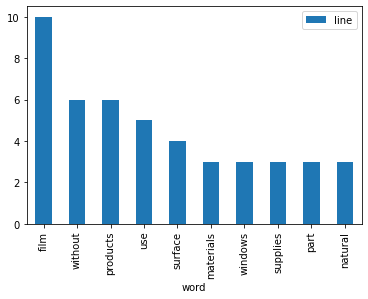

In [87]:
context.plot_word_dict_graph(summary, VOCAB)

In [88]:
context.save('sample.json')

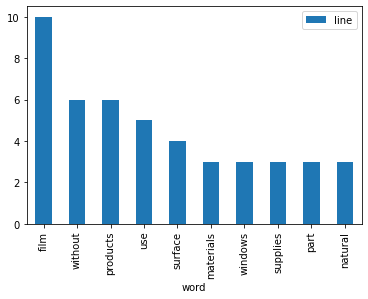

In [89]:
cntx = Context.load('sample.json')
sumry = cntx.generate_summary()
cntx.plot_word_dict_graph(sumry, VOCAB)
cntx

In [112]:
DB_C = 'DB-Contex'
DB_CV = 'DB-ContexVocab'
ignore = ['script', 'img', 'table', 'button', 'i', 'noscript', 'style', 'form', 'meta']
for i, file in enumerate(all_files[205:], 205):
    raw_context = RawHtmlContent.load(file)
    print(raw_context.meta)
    if raw_context.meta['link'].endswith('pdf'): continue
    if len(raw_context.meta['link'].split(' and ')) > 1: continue

    raw_body = Body(raw_context.content, ignore=ignore)
    lines = raw_body.extract_lines()
    cleaned = CleanLines(lines, lower=True)

    Context(cleaned.lines, about=raw_context.meta).save(f"{DB_C}/{i}.json")
    Context(cleaned.match_vocab(VOCAB), about=raw_context.meta).save(f"{DB_CV}/{i}.json")
    

{'link': 'https://multimedia.3m.com/mws/media/823819O/3m-scotchkote-pipe-renewal-liner-2400.pdf   and  https://www.3m.com.my/3M/en_MY/p/d/b00021897/'}
{'link': 'https://www.powerandcables.com/product/product-category/3m-scotchcast-resin-cable-joints-91-nba/'}
{'link': 'https://www.3mnz.co.nz/3M/en_NZ/p/dc/v000079273/'}
{'link': 'https://www.3m.co.uk/3M/en_GB/p/d/eebgemdeu00420/'}
{'link': 'https://www.3m.co.uk/3M/en_GB/p/d/eebgemdeu00420/'}
{'link': 'https://www.3m.com/3M/en_US/p/dc/v000081605/  '}
{'link': 'https://www.3m.com/3M/en_US/p/dc/v000081610/                                  '}
{'link': 'https://www.3m.com/3M/en_LB/p/d/v000084897/'}
{'link': 'https://xonstorage.blob.core.windows.net/pdf/3m_681_sup1manufacturerlinknew.pdf'}
{'link': 'https://www.3mcanada.ca/3M/en_CA/p/d/v000085290/'}
{'link': 'https://www.3mcanada.ca/3M/en_CA/p/d/v000076785/'}
{'link': 'https://www.3m.com/3M/en_US/p/dc/v100774093/'}
{'link': 'https://www.3m.com/3M/en_US/p/dc/v101259111/'}
{'link': 'https://www